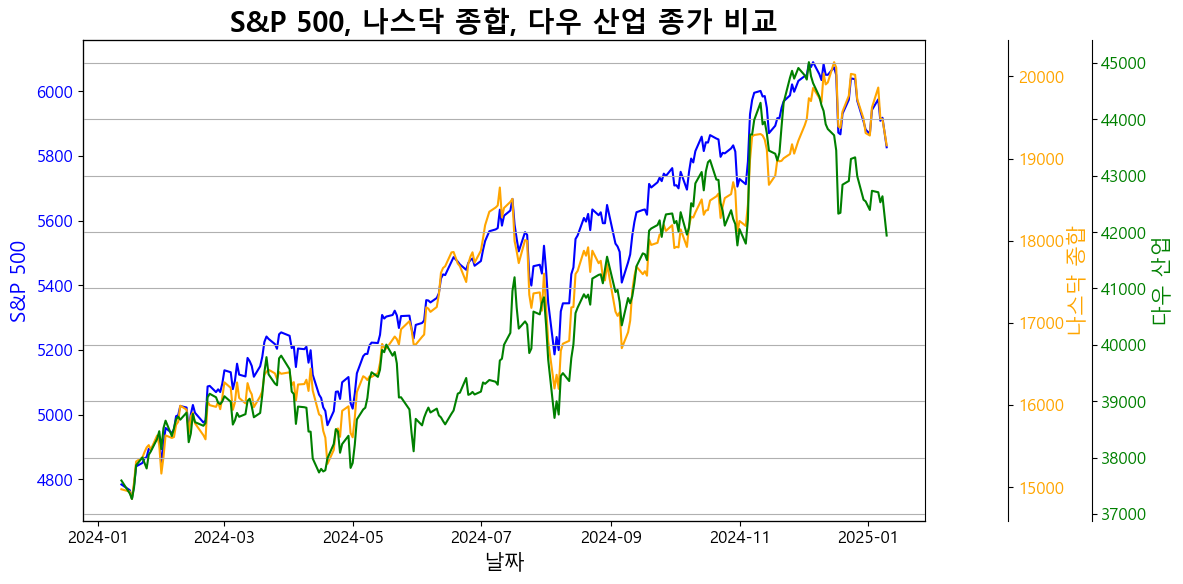

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# JSON 파일에서 데이터 로드
with open('financial_crawl.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 각 지수의 종가 데이터와 날짜를 DataFrame으로 변환
dates = []
snp500_close = []
nasdaq_close = []
dji_close = []

for entry in data['S&P 500']:
    dates.append(entry['날짜'])
    snp500_close.append(entry['종가'])

for entry in data['나스닥 종합']:
    nasdaq_close.append(entry['종가'])

for entry in data['다우 산업']:
    dji_close.append(entry['종가'])

# 날짜 형식 변환 및 DataFrame 생성
df = pd.DataFrame({
    '날짜': pd.to_datetime(dates),
    'S&P 500': snp500_close,
    '나스닥 종합': nasdaq_close,
    '다우 산업': dji_close
})

# 인덱스를 날짜로 설정
df.set_index('날짜', inplace=True)

# 시계열 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

# S&P 500 선 그리기
ax1.plot(df.index, df['S&P 500'], label='S&P 500', color='blue')
ax1.set_ylabel('S&P 500', fontsize=15, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 생성
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))  # 오른쪽으로 이동
ax2.plot(df.index, df['나스닥 종합'], label='나스닥 종합', color='orange')
ax2.set_ylabel('나스닥 종합', fontsize=15, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 세 번째 Y축 생성
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 120))  # 오른쪽으로 더 이동
ax3.plot(df.index, df['다우 산업'], label='다우 산업', color='green')
ax3.set_ylabel('다우 산업', fontsize=15, color='green')
ax3.tick_params(axis='y', labelcolor='green')

# 그래프 제목 및 레이블 설정
plt.title('S&P 500, 나스닥 종합, 다우 산업 종가 비교', fontsize=20, fontweight='bold')
ax1.set_xlabel('날짜', fontsize=15)

# 범례 설정
fig.tight_layout()
plt.grid()
plt.show()




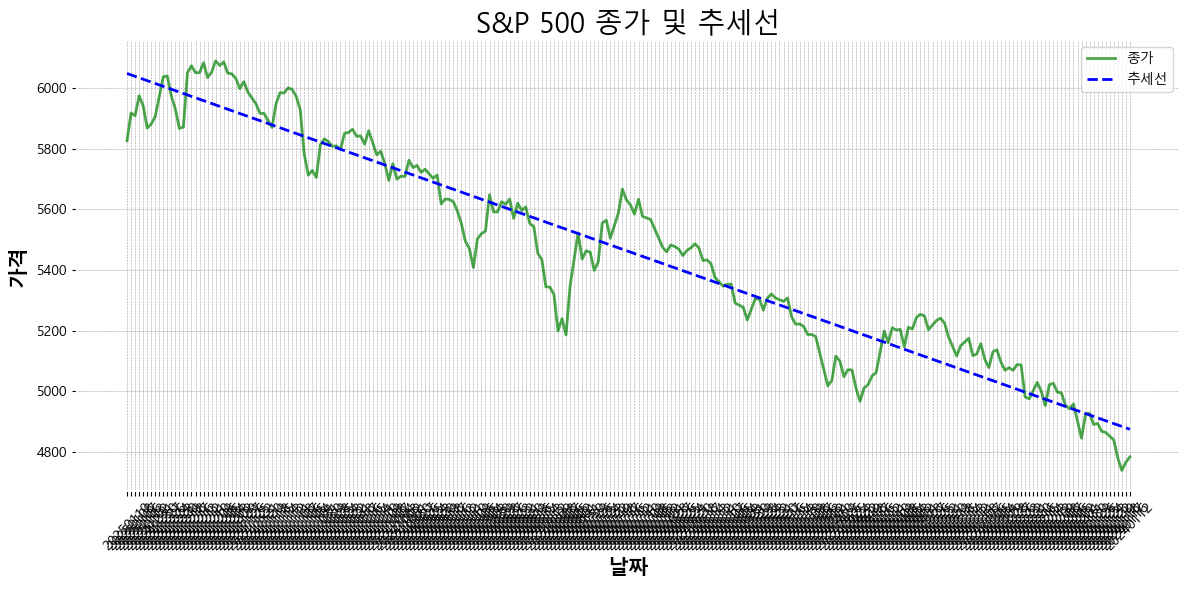

In [33]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

# Malgun Gothic 폰트 설정
mpl.rc('font', family='Malgun Gothic')

# JSON 파일에서 데이터 로드
with open('financial_crawl.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# 각 지수의 시가, 고가, 저가, 종가, 전일 대비 변동성을 DataFrame으로 변환
snp500_data = []
nasdaq_data = []
dji_data = []

# S&P 500 데이터
for entry in data['S&P 500']:
    snp500_data.append([entry['날짜'], entry['시가'], entry['고가'], entry['저가'], entry['종가'], entry['전일대비']])

# 나스닥 종합 데이터
for entry in data['나스닥 종합']:
    nasdaq_data.append([entry['날짜'], entry['시가'], entry['고가'], entry['저가'], entry['종가'], entry['전일대비']])

# 다우 산업 데이터
for entry in data['다우 산업']:
    dji_data.append([entry['날짜'], entry['시가'], entry['고가'], entry['저가'], entry['종가'], entry['전일대비']])

# DataFrame 생성
snp500_df = pd.DataFrame(snp500_data, columns=['날짜', '시가', '고가', '저가', '종가', '전일대비'])
nasdaq_df = pd.DataFrame(nasdaq_data, columns=['날짜', '시가', '고가', '저가', '종가', '전일대비'])
dji_df = pd.DataFrame(dji_data, columns=['날짜', '시가', '고가', '저가', '종가', '전일대비'])

# 종가 데이터 추출
dates = np.arange(len(snp500_df))  # 날짜를 숫자 형태로 변환
prices = snp500_df['종가'].astype(float).values  # 종가 데이터

# 회귀 분석
model = LinearRegression()
model.fit(dates.reshape(-1, 1), prices)

# 회귀선 데이터
trend_line = model.predict(dates.reshape(-1, 1))

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(snp500_df['날짜'], prices, label='종가', color='green', alpha=0.7)
plt.plot(snp500_df['날짜'], trend_line, label='추세선', color='blue', linestyle='--', linewidth=2)

# 레이블 및 제목 설정
plt.xlabel('날짜', fontsize=15)
plt.ylabel('가격', fontsize=15)
plt.title('S&P 500 종가 및 추세선', fontsize=20)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
